<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 250px; display: inline"  alt="Wikistat"/></a>

<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" style="float:right; max-width: 250px; display: inline" alt="IMT"/> </a>
</center>

#  Partie 1 : Prise en main de la librairie PyWavelet pour des signaux 1D 

## Bases d'ondelettes

In [1]:
import pywt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [3]:
pywt.families(short=False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

In [4]:
pywt.wavelist(family='db')


['db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38']

In [5]:
pywt.wavelist(kind='continuous')

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

In [6]:
wavelet = pywt.Wavelet('db1')

In [7]:
print(wavelet)

Wavelet db1
  Family name:    Daubechies
  Short name:     db
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


In [8]:
haarwavelet = pywt.Wavelet('haar')
print(haarwavelet)

Wavelet haar
  Family name:    Haar
  Short name:     haar
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


Définition des fonctions d'échelle et d'ondelette : 

In [9]:
 print(wavelet.dec_lo,wavelet.dec_hi)

[0.7071067811865476, 0.7071067811865476] [-0.7071067811865476, 0.7071067811865476]


In [10]:
print(haarwavelet.dec_lo,haarwavelet.dec_hi)

[0.7071067811865476, 0.7071067811865476] [-0.7071067811865476, 0.7071067811865476]


**Que remarquez-vous ? Essayez avec d'autres bases d'ondelettes**

[ 0.  1.  1.  0.]
[ 0.  1. -1.  0.]
[ 0.   0.5  1.   1.5]


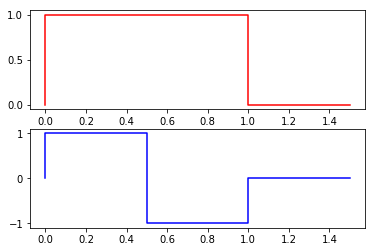

In [11]:
wavelet = pywt.Wavelet('haar')
phi, psi, x = wavelet.wavefun(level=1)
print (phi)
print(psi)
print(x)
plt.figure(2)
plt.subplot(211)
plt.step(x,phi,'r--')
plt.subplot(212)
plt.step(x,psi,'b-')
plt.show()

[ 0.          0.02763215 -0.0298425  -0.24795136  0.02347892  0.89658165
  1.02305297  0.2819907  -0.05534419  0.04174686  0.0386548   0.          0.
  0.          0.          0.          0.          0.          0.        ]
[ 0.          0.0386548  -0.04174686 -0.05534419 -0.2819907   1.02305297
 -0.89658165  0.02347892  0.24795136 -0.0298425  -0.02763215  0.          0.
  0.          0.          0.          0.          0.          0.        ]
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.
  7.5  8.   8.5  9. ]


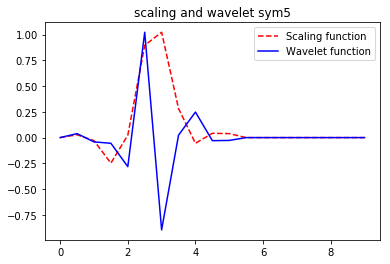

In [12]:
wavelet = pywt.Wavelet('sym5')
phi, psi, x = wavelet.wavefun(level=1)
print (phi)
print(psi)
print(x)
p1,=plt.plot(x,phi,'r--')
p2,=plt.plot(x,psi,'b-')
plt.title("scaling and wavelet sym5")
plt.legend([p1, p2], ['Scaling function', 'Wavelet function'])
plt.show()
# Augmenter la valeur de level

## Décomposition en ondelettes : wavelet transform



### Single level discrete wavelet transform

Avec la fonction pywt.dwt, on obtient en sortie 2 vecteurs de coefficients de même taille, calculés au niveau maximal possible en fonction de la taille des données d'entrée: 
 - les coefficients d'approximation (ou d'échelle) et
 - les coefficients de détail (ou d'ondelettes)  

In [13]:
(cA, cD) = pywt.dwt([1, 2, 3, 4, 5,6,7,8], 'db1')
(cA1, cD1) = pywt.dwt([8,7, 6, 5, 4, 3, 2, 1], 'db1')
# Coefficients d'approximation (ou d'échelle)
print(cA)
# Coefficients de détail (ou d'ondelette)
print(cD)
# Pour un signal de taille n, il calcule n/2 (environ) coefficients d'échelle et n/2 coefficients d'ondelette
print(cA1)
print(cD1)


[  2.12132034   4.94974747   7.77817459  10.60660172]
[-0.70710678 -0.70710678 -0.70710678 -0.70710678]
[ 10.60660172   7.77817459   4.94974747   2.12132034]
[ 0.70710678  0.70710678  0.70710678  0.70710678]


Retrouvez ces résultats à partir de la définition de la base  de Haar

In [14]:
data=[1, 2, 3, 4, 5,6,7,8]
w=pywt.Wavelet('db1')
len(cA) == len(cD) == np.floor((len(data) + w.dec_len - 1) / 2)

True

### Multi-level decomposition

Avec la fonction **wavedec**, on peut préciser le niveau souhiaté (level) on obtient en sortie plusieurs vecteurs de coefficients  
 - les coefficients d'approximation (ou d'échelle) au niveau demandé
 - les coefficients de détail (ou d'ondelettes) à tous les niveaux supérieurs, jusqu'au niveau maximal. 
 
Si la valeur du niveau est $L$, en sortie, on récupère les vecteurs cAL, cDL, .. cD1, où cD1 est le vecteur des coefficient de détail au niveau le plus fin possible. 
 
Ceci correspond à la décomposition suivante : 
 
 $$ f(x)=\sum_{ k \in \Lambda( j_0)} \alpha_{j_0,k}\phi_{j_0,k} + \sum_{j = j_0}^{J_{max}}\sum_{k  \in \Lambda( j)} \beta_{j,k} \psi_{j,k},$$
 
 avec $j_0=J_{max} +1-L$
 
- Il sera utile d'utiliser cette décomposition pour applique un seuillage sur les coefficients de détails $\beta_{j,k} $  pour  $ j \geq j_0$. 

In [15]:
from pywt import wavedec

coeffs = wavedec([1,2,3,4,5,6,7,8], 'db1',level=2)

#print(coeffs[0].shape)
#detail=coeffs[-1]
#print(detail)

print(coeffs)
cA2, cD2 , cD1 = coeffs

print(cA2)
print(cD2)
print(cD1)

[array([  5.,  13.]), array([-2., -2.]), array([-0.70710678, -0.70710678, -0.70710678, -0.70710678])]
[  5.  13.]
[-2. -2.]
[-0.70710678 -0.70710678 -0.70710678 -0.70710678]


Retrouvez ces résultats à partir de la définition de la base  de Haar

In [16]:
from pywt import wavedec

coeffs = wavedec([1,2,3,4,5,6,7,8], 'db1', level=3)
print(coeffs)

[array([ 12.72792206]), array([-5.65685425]), array([-2., -2.]), array([-0.70710678, -0.70710678, -0.70710678, -0.70710678])]


### Niveau maximal de décomposition

Permet de savoir à quel niveau maximal on peut décomposer en fonction de la taille des données et de  l'ondelette choisie 

In [17]:
w = pywt.Wavelet('haar')

pywt.dwt_max_level(data_len=1000, filter_len=w.dec_len)

# Ou plus simplement :

pywt.dwt_max_level(1000, w)

# Reprendre avec data_len=1024


9

###  Mode de complétion des données (Signal extension mode)

Afin d'appliquer les algorithmes de transformée en ondelette discrète, on a besoin au préalable de compléter les données pour éviter les effets de bords. Il y a plusieurs manières de faire ceci, correspondant à différents "modes" proposés par python : 
 - Le mode  <b> zero-padding  </b>  qui consiste à compléter par des zéros de part et d'autre :
 $.. \quad 0 \quad 0 \quad|\quad x_1 \quad x_2  \quad.. \quad x_n \quad| \quad 0 \quad 0 \quad .. $
 - Le mode  <b> constant-padding  </b>  qui consiste à répliquer les données des bords de part et d'autre :
 $.. \quad x_1 \quad x_1 \quad|\quad x_1 \quad x_2  \quad.. \quad x_n \quad| \quad x_n \quad x_n \quad .. $
 - Le mode  <b> symmetric-padding  </b>  qui consiste à compléter par symétrie de part et d'autre :
 $.. \quad x_2 \quad x_1 \quad|\quad x_1 \quad x_2  \quad.. \quad x_n \quad| \quad x_n \quad x_{n-1} \quad .. $
 - Le mode  <b> periodic-padding  </b>  qui consiste à considérer que le signal est périodique :
 $.. \quad x_{n-1} \quad x_n \quad|\quad x_1 \quad x_2  \quad.. \quad x_n \quad| \quad x_1 \quad x_{2} \quad .. $
 - Le mode  <b> smooth-padding  </b>  qui consiste à compléter par prolongement linéaire à partir de la dérivée calculée sur les bords. 

In [18]:
print(pywt.Modes.modes)

['zero', 'constant', 'symmetric', 'periodic', 'smooth', 'periodization', 'reflect']


In [19]:
(cA, cD) = pywt.dwt([1, 2, 3, 4, 5,6], 'db2',pywt.Modes.smooth)
print(cA)
print(cD)

[-0.51763809  2.31078903  5.13921616  7.96764328]
[  0.00000000e+00   1.66533454e-16   3.33066907e-16   2.22044605e-16]


In [20]:
(cA, cD) = pywt.dwt([1, 2, 3, 4, 5,6], 'db2','zero')
print(cA)
print(cD)

[-0.03467518  2.31078903  5.13921616  7.43391239]
[ -1.29409523e-01   1.66533454e-16   3.33066907e-16  -1.99191082e+00]


##  Reconstruction du signal : Inverse wavelet transform

### Single level reconstruction

In [21]:
(cA, cD) = pywt.dwt([1,2,3,4,5,6,7,8], 'db2')

pywt.idwt(cA, cD, 'db2')

# On retrouve le signal initial


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.])

In [22]:
(cA, cD) = pywt.dwt([1,2,3,4,5,6], 'db2')

A = pywt.idwt(cA, None, 'db2')

D = pywt.idwt(None, cD, 'db2')

print(A)
print(D)

# Ici on reconstruit séparement avec les coefficients d'approximation et ceux de détail

print(A + D)



[ 1.51225953  1.70424682  3.          4.          5.07924682  6.13725953]
[ -5.12259526e-01   2.95753175e-01   9.62059197e-17  -1.55084387e-16
  -7.92468245e-02  -1.37259526e-01]
[ 1.  2.  3.  4.  5.  6.]


### Multilevel reconstruction

In [23]:

coeffs = pywt.wavedec([1,2,3,4,5,6,7,8], 'db1',level=2)

pywt.waverec(coeffs, 'db1')


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.])

In [24]:
data = [1,2,3,4,5,6,7,8]

(cA, cD) = pywt.dwt(data, 'db1')

print(cA)
print(cD)

# Reconstruction
pywt.upcoef('a', cA, 'db1') + pywt.upcoef('d', cD, 'db1')


[  2.12132034   4.94974747   7.77817459  10.60660172]
[-0.70710678 -0.70710678 -0.70710678 -0.70710678]


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.])

In [25]:
# On peut aussi préciser la taille des données initiales

n = len(data)

pywt.upcoef('a', cA, 'db1', take=n) + pywt.upcoef('d', cD, 'db1', take=n)


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.])

## Seuillage :  Wavelet Thresholding

In [26]:

vect = np.linspace(1, 5, 9)
vect 


array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ])

Seuillage doux : 

In [27]:
pywt.threshold(vect, 2, 'soft')

array([ 0. ,  0. ,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ])

Seuillage dur : 

In [28]:
pywt.threshold(vect, 2, 'hard')

array([ 0. ,  0. ,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ])

In [29]:
pywt.threshold(vect, 2, 'greater')

array([ 0. ,  0. ,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ])

In [30]:
pywt.threshold(vect, 2, 'less')

array([ 1. ,  1.5,  2. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

#  Partie 2 : Application au débruitage de  signaux 1D 

Source :  http://jseabold.net/blog/2012/02/23/wavelet-regression-in-python/

## Définition et tracé des signaux 

In [31]:
def doppler(x):
    """
    Parameters
    ----------
    x : array-like
        Domain of x is in (0,1]
 
    """
    if not np.all((x >= 0) & (x <= 1)):
        raise ValueError("Domain of doppler is x in (0,1]")
    return np.sqrt(x*(1-x))*np.sin((2.1*np.pi)/(x+.05))
 
def blocks(x):
    """
    Piecewise constant function with jumps at t.
 
    Constant scaler is not present in Donoho and Johnstone.
    """
    K = lambda x : (1 + np.sign(x))/2.
    t = np.array([[.1, .13, .15, .23, .25, .4, .44, .65, .76, .78, .81]]).T
    h = np.array([[4, -5, 3, -4, 5, -4.2, 2.1, 4.3, -3.1, 2.1, -4.2]]).T
    return 3.655606 * np.sum(h*K(x-t), axis=0)
 
def bumps(x):
    """
    A sum of bumps with locations t at the same places as jumps in blocks.
    The heights h and widths s vary and the individual bumps are of the
    form K(t) = 1/(1+|x|)**4
    """
    K = lambda x : (1. + np.abs(x)) ** -4.
    t = np.array([[.1, .13, .15, .23, .25, .4, .44, .65, .76, .78, .81]]).T
    h = np.array([[4, 5, 3, 4, 5, 4.2, 2.1, 4.3, 3.1, 2.1, 4.2]]).T
    w = np.array([[.005, .005, .006, .01, .01, .03, .01, .01, .005, .008, .005]]).T
    return np.sum(h*K((x-t)/w), axis=0)
 
def heavisine(x):
    """
    Sinusoid of period 1 with two jumps at t = .3 and .72
    """
    return 4 * np.sin(4*np.pi*x) - np.sign(x - .3) - np.sign(.72 - x)

In [32]:
x = np.linspace(0,1,2**11)
ydop = doppler(x)
yblk = blocks(x)
ybmp = bumps(x)
yhsin = heavisine(x)

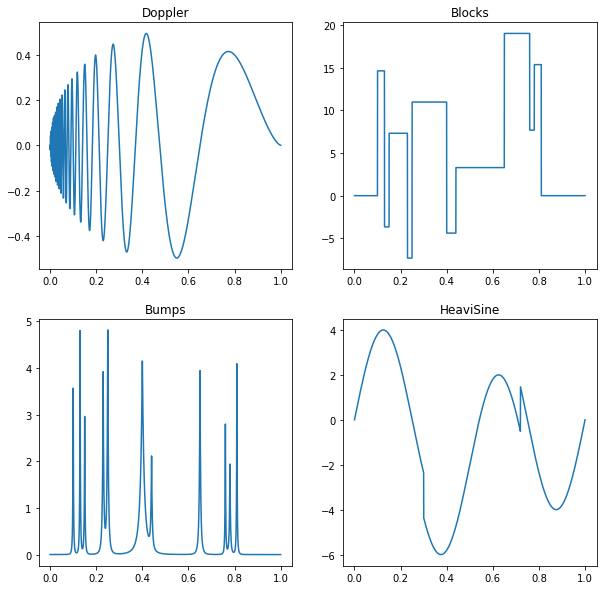

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
p1 = axes[0,0]
p2 = axes[0,1]
p3 = axes[1,0]
p4 = axes[1,1]

p1.plot(x,ydop)
p1.set_title("Doppler")

p2.plot(x,yblk)
p2.set_title("Blocks")

p3.plot(x,ybmp)
p3.set_title("Bumps")

p4.set_title("HeaviSine")
p4.plot(x,yhsin)

#
plt.show()

## Ajout du bruit

In [34]:
from scipy import stats

np.random.seed(54321)

y_doppler = doppler(np.linspace(0,1,2**8))
yb_doppler = y_doppler+ 0.2*stats.norm().rvs(2**8)


y_blocks = blocks(np.linspace(0,1,2**8))
yb_blocks = y_blocks + stats.norm().rvs(2**8)

y_bumps = bumps(np.linspace(0,1,2**8))
yb_bumps = y_bumps + 0.5*stats.norm().rvs(2**8)

y_heavisine =heavisine(np.linspace(0,1,2**8))
yb_heavisine = y_heavisine + stats.norm().rvs(2**8)



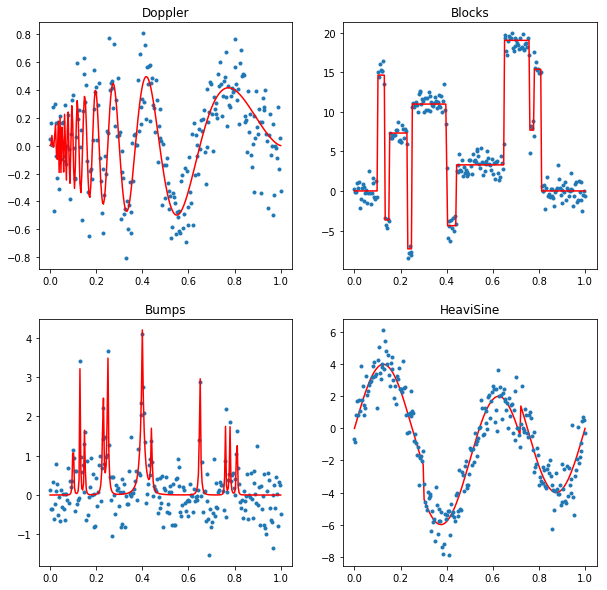

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
p1 = axes[0,0]
p2 = axes[0,1]
p3 = axes[1,0]
p4 = axes[1,1]

x = np.linspace(0,1,2**8)
p1.plot(x,yb_doppler,'.')
p1.plot(x,y_doppler,'red')
p1.set_title("Doppler")

p2.plot(x,yb_blocks,'.')
p2.plot(x,y_blocks,'red')
p2.set_title("Blocks")

p3.plot(x,yb_bumps,'.')
p3.plot(x,y_bumps,'red')
p3.set_title("Bumps")

p4.set_title("HeaviSine")
p4.plot(x,y_heavisine,'red')
p4.plot(x,yb_heavisine,'.')

#
plt.show()

## Représentation des coefficients d'ondelettes par niveau : 
**La fonction ci dessous permet de représenter les coefficients d'ondelette par niveau : **

In [36]:
def coef_pyramid_plot(coefs, first=0, scale='uniform', ax=None):
    
    
    """
    Parameters
    ----------
    coefs : array-like
        Wavelet Coefficients. Expects an iterable in order Cdn, Cdn-1, ...,
        Cd1, Cd0.
    first : int, optional
        The first level to plot.
    scale : str {'uniform', 'level'}, optional
        Scale the coefficients using the same scale or independently by
        level.
    ax : Axes, optional
        Matplotlib Axes instance

    Returns
    -------
    Figure : Matplotlib figure instance
        Either the parent figure of `ax` or a new pyplot.Figure instance if
        `ax` is None.
    """

    if ax is None:
        import matplotlib.pyplot as plt
        fig = plt.figure()
        ax = fig.add_subplot(111, axisbg='lightgrey')
    else:
        fig = ax.figure

    n_levels = len(coefs)
    n = 2**(n_levels - 1) # assumes periodic

    if scale == 'uniform':
        biggest = [np.max(np.abs(np.hstack(coefs)))] * n_levels
    else:
        # multiply by 2 so the highest bars only take up .5
        biggest = [np.max(np.abs(i))*2 for i in coefs]

    for i in range(first,n_levels):
        x = np.linspace(2**(n_levels - 2 - i), n - 2**(n_levels - 2 - i), 2**i)
        ymin = n_levels - i - 1 + first
        yheight = coefs[i]/biggest[i]
        ymax = yheight + ymin
        ax.vlines(x, ymin, ymax, linewidth=1.1)

    ax.set_xlim(0,n)
    ax.set_ylim(first - 1, n_levels)
    ax.yaxis.set_ticks(np.arange(n_levels-1,first-1,-1))
    ax.yaxis.set_ticklabels(np.arange(first,n_levels))
    ax.tick_params(top=False, right=False, direction='out', pad=6)
    ax.set_ylabel("Levels", fontsize=14)
    ax.grid(True, alpha=.85, color='white', axis='y', linestyle='-')
    ax.set_title('Wavelet Detail Coefficients', fontsize=16,
            position=(.5,1.05))
    fig.subplots_adjust(top=.89)

    return fig

** Tracé des coefficients des signaux bruités à l'aide de la fonction coef_pyramid_plot**

/Users/bguillouet/anaconda/envs/TPInsa/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


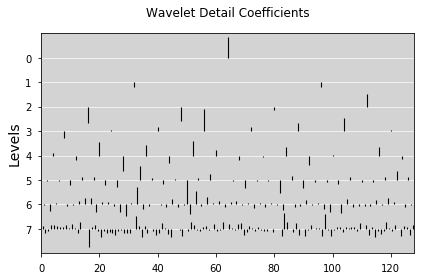

In [37]:
coefs = pywt.wavedec(yb_bumps, 'db1')

fig = coef_pyramid_plot(coefs[1:]) ;
plt.title("Wavelet Detail Coefficients");

fig.tight_layout()

plt.show()


## Approximation linéaire : 

** Approximation linéaire de la fonction blocks ** : on garde les coefficients d'approximation à un certain niveau, on annule les coefficients de détails de niveaux supérieurs. Ceci correspond à la décomposition suivante : 
 
 $$ \hat{f}(x)=\sum_{ k \in \Lambda( j_0)} \alpha_{j_0,k}\phi_{j_0,k} .$$



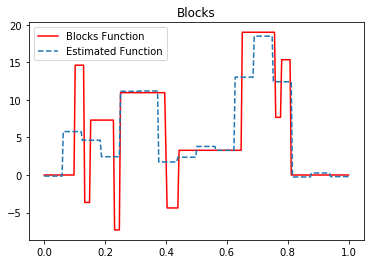

In [38]:
from pywt import wavedec

coeffs = wavedec(yb_blocks, 'db1', level=4)

cA4, cD4, cD3, cD2 , cD1 = coeffs

cD4=np.zeros(len(cD4))
cD3=np.zeros(len(cD3))
cD2=np.zeros(len(cD2))
cD1=np.zeros(len(cD1))

coeff_lin4= cA4, cD4, cD3, cD2 , cD1 

blocks_rec=pywt.waverec(coeff_lin4, 'db1')

x = np.linspace(0,1,2**8)

plt.plot(x,y_blocks,'red',label="Blocks Function")
plt.plot(x,blocks_rec,'--',label="Estimated Function")
plt.title("Blocks")
plt.legend()
plt.show()

** Q ** L'approximation vous semble-t-elle bonne ? Combien a-t-on gardé de coefficients ? 

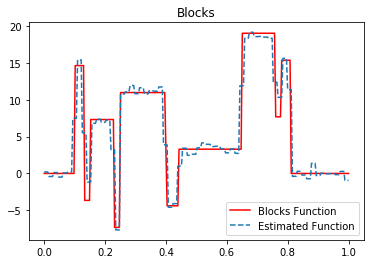

nombre de coefficients non nuls =  64


In [40]:
from pywt import wavedec

coeffs = wavedec(yb_blocks, 'db1', level=2)

cA2, cD2 , cD1 = coeffs

cD2=np.zeros(len(cD2))
cD1=np.zeros(len(cD1))

coeff_lin2= cA2, cD2 , cD1 

blocks_rec=pywt.waverec(coeff_lin2, 'db1')

x = np.linspace(0,1,2**8)

plt.plot(x,y_blocks,'red',label="Blocks Function")
plt.plot(x,blocks_rec,'--',label="Estimated Function")
plt.title("Blocks")
plt.legend()
plt.show()

#Reconstruction correcte 
#Nombre de coefficients non nuls : 
nbcoef=sum(cA2!=0)+sum(cD2!=0)+sum(cD1!=0)
print('nombre de coefficients non nuls = ', nbcoef)


## Approximation non linéaire par seuillage 

** On voit qu'il est préférable de considérer une approximation non linéaire par seuillage afin d'avoir une bonne qualité d'approximation avce moins de coefficients**

- Tout d'abord en utilisant la décomposition single level 
- Puis en utilisant la décomposition multilevel plus adaptée. 

In [41]:
(cA, cD) = pywt.dwt(yb_blocks, 'db1')

#print(cA)
#print(cD)

sigma=1
# Calcul du seuil 
thresh = sigma*np.sqrt(2*np.log(len(yb_blocks)))

# On seuille seulement les coefficients de détail : 
cDth=pywt.threshold(cD, thresh, 'hard')

#print(cDth)



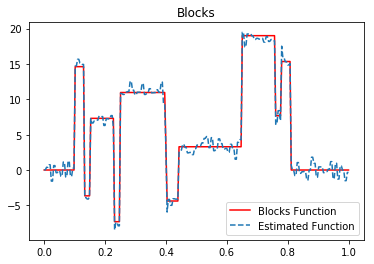

In [42]:
# Reconstruction
yb_blocks_rec= pywt.upcoef('a', cA, 'db1') + pywt.upcoef('d', cDth, 'db1')

x = np.linspace(0,1,2**8)

plt.plot(x,y_blocks,'red',label="Blocks Function")
plt.plot(x,yb_blocks_rec,'--',label="Estimated Function")
plt.title("Blocks")
plt.legend()
plt.show()

On voit que la reconstruction est encore beaucoup trop bruitée. 
Cela vient du fait que l'on a seuillé que les coefficients de détail de niveau le plus élevé. 
Nous allons utiliser la décomposition en ondelette multiniveau pour pouvoir seuiller beaucoup plus de coefficients de détail. 

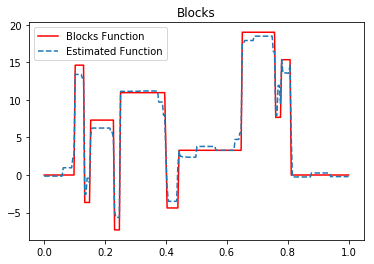

nombre de coefficients non nuls =  29


In [44]:
from pywt import wavedec

coeffs = wavedec(yb_blocks, 'db1', level=4)
cA4, cD4, cD3, cD2 , cD1 = coeffs

sigma=1
# Calcul du seuil 
thresh = sigma*np.sqrt(2*np.log(len(yb_blocks)))

cD4th=pywt.threshold(cD4, thresh, 'soft')
cD3th=pywt.threshold(cD3, thresh, 'soft')
cD2th=pywt.threshold(cD2, thresh, 'soft')
cD1th=pywt.threshold(cD1, thresh, 'soft')

coeffsth= cA4, cD4th, cD3th, cD2th , cD1th
blocks_rec=pywt.waverec(coeffsth, 'db1')


x = np.linspace(0,1,2**8)

plt.plot(x,y_blocks,'red',label="Blocks Function")
plt.plot(x,blocks_rec,'--',label="Estimated Function")
plt.title("Blocks")
plt.legend()
plt.show()

#Reconstruction correcte 
#Nombre de coefficients non nuls : 
nbcoef=sum(cD4th!=0)+sum(cD3th!=0)+sum(cD2th!=0)+sum(cD1th!=0)
print('nombre de coefficients non nuls = ', nbcoef)

** Q ** Que concluez vous sur cette dernière méthode ? 